
# Zeitdiskreter Integrator # 
## P/N-Plan, Frequenzgang und Impulsantwort ##

Dieses Notebook demonstriert wie sich die Eigenschaften eines zeitdiskreten Integrators in Abhängigkeit von seiner Dämpfungskonstante $\alpha$ ändern.

In [1]:
# Zeige Plots nicht als neue Fenster:
%matplotlib inline 

from __future__ import division, print_function

import numpy as np
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, 
                   linspace, array, zeros, ones)
import scipy.signal as sig

import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel, setp,
    subplot, tight_layout, title, clf, xlim, ylim)

from ipywidgets import (interact,FloatSlider,IntSlider,__version__)

import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import dsp_fpga_lib as dsp
plt.rcParams.update(dsp.mpl_rc) # define plot properties 
print("ipywidgets:", __version__)

ipywidgets: 7.1.1


In [6]:
def filterIntegrator(alpha=0):
    b = [1, 0] #Zaehler: z
    a = [1, -alpha] #Nenner: z+alpha
    
    if(alpha == -1):
        print('Division by Zero!')
    else:
        fig = figure(figsize=(15,6));
        ax1 = fig.add_subplot(131)
        ax1.set_title('PN-Plan (zplane)')
        dsp.zplane(b,a, plt_ax=ax1) #Plotte P/N Diagramm
        ax1.set_xlabel('$Re$') 
        ax1.set_ylabel('$Im$')

        #Frequenzgang H(f)
        ax2 = subplot(132)
        ax2.set_title('Frequenzgang')
        f_S=1
        [W,H] = sig.freqz(b,a,1024)
        ax2.plot(W/(2*pi),abs(H),linewidth = 2)
        ax2.set_xlabel(r'$F$  bzw. $\Omega / 2 \pi$') 
        ax2.set_ylabel(r'$|H(F)| \; \rightarrow$')

        #Berechne 20 Werte der Impulsantwort:
        ax3 = fig.add_subplot(133)
        ax3.set_title('Impulsantwort')
        [himp,t] = dsp.impz(b,a,20,f_S)
        ax3.stem(t,himp) # Impulsantwort
        ax3.set_xlabel('$n$'); ax3.set_ylabel(r'$h[n]$')

        #sicherstellen, dass Plots nicht überlappen
        fig.tight_layout()
        plt.show; #Plot anzeigen

Der Integrator hat die folgende Systemfunktion:
$$H_i(z) = \frac{z}{z - \alpha} $$

Ändern Sie in der folgenden Zelle den Wert für alpha und führen Sie sie aus:

interactive(children=(FloatSlider(value=0.7, continuous_update=False, description='alpha', max=2.0, min=-2.0), Output()), _dom_classes=('widget-interact',))

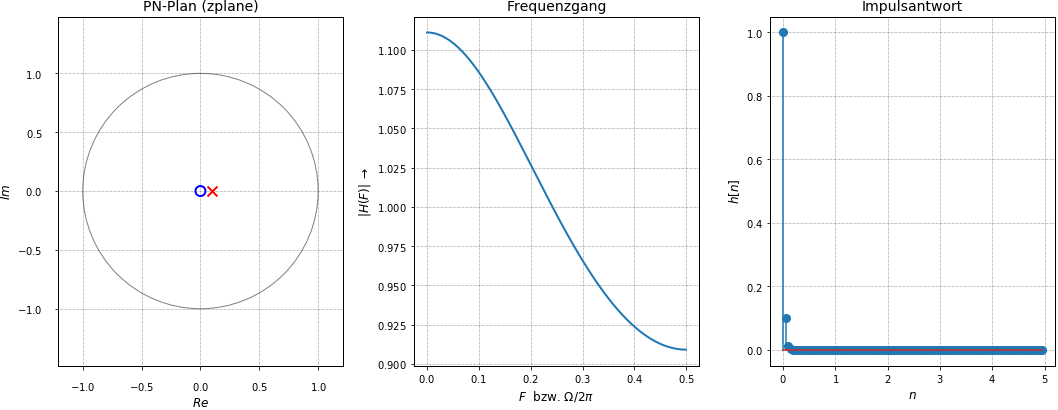

In [7]:
#Slider erzeugen, der filterIntegrator bei jeder Änderung aufruft - funktioniert nicht mehr unter matplotlib 2.1
interact(filterIntegrator, alpha=FloatSlider(value=0.7,min=-2,max=2,step=0.1,continuous_update=False));
filterIntegrator(alpha = 0.1)

---
**Copyright**


(c) 2016, 2017-Oct-07 Rebecca Janßen and Prof. Dr. Christian Münker

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.